In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 9})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5

In [3]:
def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [4]:
# First let's find all of our data
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
dataPath = ipyPath + '/all_data'

# Go to the correct parent directory
os.chdir(ipyPath)
txtFiles = os.listdir(dataPath)
numFiles = len(txtFiles)

In [5]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [6]:
# You want to load the data in so that it's sorted to begin with
paList = []
pbList = []
prList = []
xaList = []
for i in xrange(numFiles):
    paList.append(getFromTxt(txtFiles[i], "pa", "_pb"))
    pbList.append(getFromTxt(txtFiles[i], "pb", "_xa"))
    xaList.append(getFromTxt(txtFiles[i], "xa", "_ep"))
    # We want to use ratios rounded to nearest 0.05
    tmpPeR = round(paList[i]/pbList[i] * 2, 1) / 2
    prList.append(tmpPeR)
    
# Now sort the array of txtFile names
indArr = multiSort(prList, paList, xaList)
indSort(txtFiles, indArr)

In [7]:
# Read in the data in pandas dataframes
all_sims = []
os.chdir(dataPath)
for i in xrange(numFiles):
    df = pd.read_csv(txtFiles[i], sep='\s+', header=0)
    all_sims.append(df)
    
# Return to root directory
os.chdir(ipyPath)

In [8]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(numFiles):
    myBool = chkSort(all_sims[i]['Timestep'])
    if myBool is False:
        print("{} is not chronilogically sorted!").format(txtFiles[i])
        exit(1)
    else:
        print("{} sorted... ").format(txtFiles[i])

diam_pa0_pb500_xa10_ep82.txt sorted... 
diam_pa0_pb500_xa20_ep82.txt sorted... 
diam_pa0_pb500_xa30_ep82.txt sorted... 
diam_pa0_pb500_xa40_ep82.txt sorted... 
diam_pa0_pb500_xa50_ep82.txt sorted... 
diam_pa0_pb500_xa60_ep82.txt sorted... 
diam_pa0_pb500_xa70_ep82.txt sorted... 
diam_pa0_pb500_xa80_ep82.txt sorted... 
diam_pa0_pb500_xa90_ep82.txt sorted... 
diam_pa10_pb100_xa50_ep18.txt sorted... 
diam_pa20_pb200_xa50_ep34.txt sorted... 
diam_pa30_pb300_xa50_ep50.txt sorted... 
diam_pa40_pb400_xa50_ep66.txt sorted... 
diam_pa50_pb500_xa50_ep82.txt sorted... 
diam_pa60_pb600_xa50_ep98.txt sorted... 
diam_pa70_pb700_xa50_ep114.txt sorted... 
diam_pa80_pb800_xa50_ep130.txt sorted... 
diam_pa90_pb900_xa50_ep146.txt sorted... 
diam_pa100_pb1000_xa50_ep162.txt sorted... 
diam_pa110_pb1100_xa50_ep178.txt sorted... 
diam_pa120_pb1200_xa50_ep194.txt sorted... 
diam_pa130_pb1300_xa50_ep210.txt sorted... 
diam_pa140_pb1400_xa50_ep226.txt sorted... 
diam_pa150_pb1500_xa50_ep242.txt sorted... 
diam

diam_pa450_pb500_xa50_ep82.txt sorted... 
diam_pa500_pb500_xa50_ep82.txt sorted... 


In [9]:
# Add a column to the all_sims dataframe for number of clusters (of threshold size):
for i in xrange(numFiles):
    # New column for number of clusters
    all_sims[i]['nClust'] = all_sims[i]['Dense_tot'] / all_sims[i]['MCS']
    # Ger rid of NaN in favor of 0
    all_sims[i].fillna(0, inplace=True)

# display(all_sims[0])

In [10]:
# Function that will sort wrt one variable
def singleSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                arr[i], arr[j] = arr[j], arr[i]
                
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    # This is actually indpendent of runtime :)
#     sigma = 1.0
#     threeEtaPiSigma = 1.0
#     runFor = 200
#     tauBrown = 1.0
    
#     tauLJ = ((sigma**2) * threeEtaPiSigma) / epsilon
#     dt = 0.00001 * tauLJ
#     simLength = runFor * tauBrown
#     totTsteps = int(simLength / dt)
#     tstepPerTau = int(totTsteps / float(simLength))
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return tstepPerTau

def theoryDenom(xS, peS, peF):
    xS /= 100.0
    xF = 1.0 - xS
    return 4.0 * ((xS * peS) + (xF * peF))

def theory(xS, peS, peF):
    kappa = 4.05
    xS /= 100.0
    xF = 1.0 - xS
    return ((3.0 * (np.pi**2) * kappa) / (4.0 * ((xS * peS) + (xF * peF))))

# Make an additional frame that gives total number of particles, and simulation parameters
paramList = []
for i in xrange(numFiles):
    partAll = all_sims[i]['Gas_tot'][0]
    partA = all_sims[i]['Gas_A'][0]
    partB = all_sims[i]['Gas_B'][0]
    pa = getFromTxt(txtFiles[i], "pa", "_pb")
    pb = getFromTxt(txtFiles[i], "pb", "_xa")
    xa = getFromTxt(txtFiles[i], "xa", "_ep")
    ep = getFromTxt(txtFiles[i], "ep", ".txt")
    converT = computeTauPerTstep(ep)
    mytheoryDenom = theoryDenom(xa, pa, pb)
    mytheory = theory(xa, pa, pb)
    
    try:
        # Round to the nearest tenths place
        prat = round(float(pa)/float(pb) * 2, 1) / 2
    except:
        prat = 0.0
    paramList.append((partAll, partA, partB, pa, pb, xa, prat, ep, converT, mytheoryDenom, mytheory))

params = pd.DataFrame(paramList, columns=['partAll', 'partA', 'partB', 'peA',
                                          'peB', 'xA', 'peR', 'eps', 'brownTime',
                                          'theoryDenom', 'theory'])
pd.set_option('display.max_rows', 2)
display(params)

partAll  partA  partB    peA    peB    xA  peR   eps  brownTime  \
0     100000  10000  90000    0.0  500.0  10.0  0.0  82.0    8199999   
..       ...    ...    ...    ...    ...   ...  ...   ...        ...   
209   100000  50000  50000  500.0  500.0  50.0  1.0  82.0    8199999   

     theoryDenom    theory  
0         1800.0  0.066620  
..           ...       ...  
209       2000.0  0.059958  

[210 rows x 11 columns]

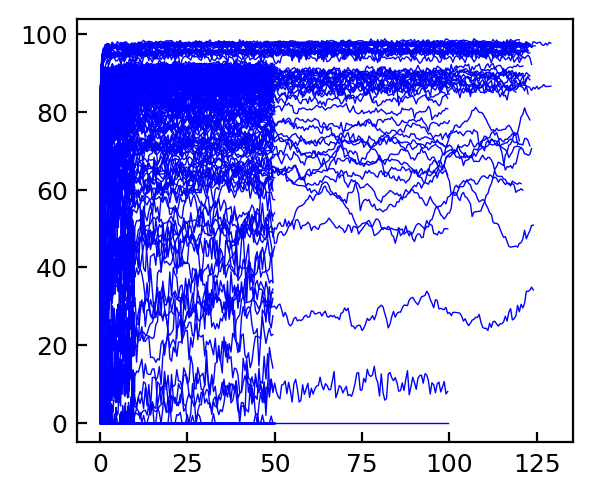

In [11]:
# Make sure I haven't messed up my data
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
plt.show()

Number of textfiles before delete: 210
Number of all_sims dataframes before delete: 210
Params rows before delete: 210
Number of textfiles after delete: 205
Number of all_sims dataframes after delete: 205
Params rows after delete: 205


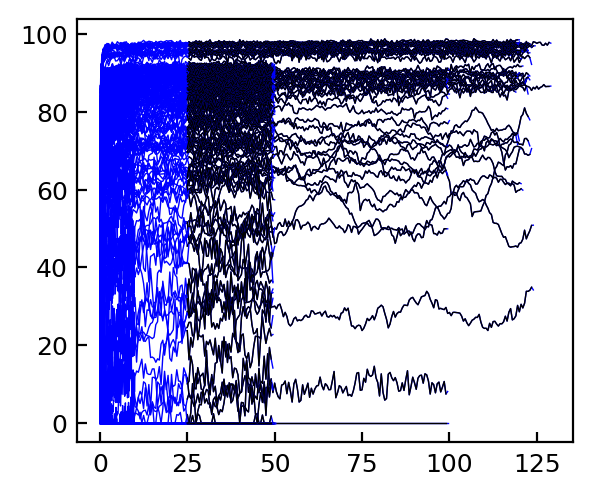

In [12]:
# Figure out how what we should use for steady-state
numFiles = len(txtFiles)
# We should average past a specific time, not an index number...
ssStartTime = 25.0
ssStartInd = []
badFiles = []
# Get indices for files which aren't at steady-state
for i in xrange(numFiles):
    if all_sims[i]['Timestep'].iloc[-1] / params['brownTime'][i] >= ssStartTime:
        for j in xrange(len(all_sims[i]['Timestep'])):
            if all_sims[i]['Timestep'][j] / params['brownTime'][i] >= ssStartTime:
                ssStartInd.append(j)
                break
    else:
        badFiles.append(i)

# Delete rows of dataframe
# Remove these indices from: txtFiles, all_sims, params
print("Number of textfiles before delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes before delete: {}").format(len(all_sims))
print("Params rows before delete: {}").format(len(params['partAll']))
if badFiles:
    # You have to reverse the order so that you don't mess up your indexing
    for myindex in sorted(badFiles, reverse=True):
        del txtFiles[myindex]
        del all_sims[myindex]
        params.drop(params.index[myindex], inplace=True)  
print("Number of textfiles after delete: {}").format(len(txtFiles))
print("Number of all_sims dataframes after delete: {}").format(len(all_sims))
print("Params rows after delete: {}").format(len(params['partAll']))

# You have to reindex the dataframe
params.index = range(len(params['partAll']))
numFiles = len(txtFiles)

# Visual check to see if this is the appropriate time window for steady-state
for i in xrange(numFiles):
    plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
             all_sims[i]['Dense_A'][:] / params['partA'][i] * 100.0,
             c='b',
             label=str(params['peR'][i]))
    plt.plot(all_sims[i]['Timestep'][ssStartInd[i]:-1] / params['brownTime'][i],
             all_sims[i]['Dense_A'][ssStartInd[i]:-1] / params['partA'][i] * 100.0,
             c='k')
plt.show()

In [13]:
# Get lists for distinct values that I might want to plot
distPeR = []
for i in xrange(numFiles):
    if params['peR'][i] not in distPeR:
        distPeR.append(params['peR'][i])
singleSort(distPeR)
print(distPeR)

distxA = []
for i in xrange(numFiles):
    if params['xA'][i] not in distxA:
        distxA.append(params['xA'][i])
singleSort(distxA)
print(distxA)

[0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1.0]
[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


In [14]:
# Now get time-based steady state values

# Make list of steady state column headers
headers = list(all_sims[0])
headers.remove('Timestep')
SS = pd.DataFrame(columns=headers)
stdErr = pd.DataFrame(columns=headers)
var = pd.DataFrame(columns=headers)
# Initialize dataframes
for i in xrange(numFiles):
    SS.loc[i] = [0] * len(headers)
    stdErr.loc[i] = [0] * len(headers)
    var.loc[i] = [0] * len(headers)
    
# Make dataframe of steady-state data
for i in xrange(numFiles):
    # Loop through each column (aside from tstep column)
    for j in range(1, len(all_sims[i].iloc[1])):
        # Compute mean of data after steady-state time (25tb) in jth column of ith file
        avg = np.mean(all_sims[i].iloc[ssStartInd[i]:-1, j])
        SS[headers[j-1]][i] = avg
        # Compute the standard deviation and variance in this data
        stdError = np.std(all_sims[i].iloc[ssStartInd[i]:-1, j])
        stdErr[headers[j-1]][i] = stdError
        var[headers[j-1]][i] = stdError ** 2
        
# Normalize by number of particles
for i in xrange(len(txtFiles)):
    if params['partA'][i] != 0:
        SS['Gas_A'][i] /= params['partA'][i]
        SS['Dense_A'][i] /= params['partA'][i]
        SS['Lc_numA'][i] /= params['partA'][i]
        # Now my standard error is a percentage
        stdErr['Gas_A'][i] /= params['partA'][i]
        stdErr['Dense_A'][i] /= params['partA'][i]
        stdErr['Lc_numA'][i] /= params['partA'][i]
        var['Gas_A'][i] /= params['partA'][i]
        var['Dense_A'][i] /= params['partA'][i]
        var['Lc_numA'][i] /= params['partA'][i]
        
    if params['partB'][i] != 0:
        SS['Gas_B'][i] /= params['partB'][i]
        SS['Dense_B'][i] /= params['partB'][i]
        SS['Lc_numB'][i] /= params['partB'][i]
        stdErr['Gas_B'][i] /= params['partB'][i]
        stdErr['Dense_B'][i] /= params['partB'][i]
        stdErr['Lc_numB'][i] /= params['partB'][i]
        var['Gas_B'][i] /= params['partB'][i]
        var['Dense_B'][i] /= params['partB'][i]
        var['Lc_numB'][i] /= params['partB'][i]

SS['Gas_tot'][:] /= params['partAll'][:]
SS['Dense_tot'][:] /= params['partAll'][:] 
SS['Lg_clust'][:] /= params['partAll'][:] 
SS['MCS'][:] /= params['partAll'][:]
stdErr['Gas_tot'][:] /= params['partAll'][:]
stdErr['Dense_tot'][:] /= params['partAll'][:] 
stdErr['Lg_clust'][:] /= params['partAll'][:] 
stdErr['MCS'][:] /= params['partAll'][:]
var['Gas_tot'][:] /= params['partAll'][:]
var['Dense_tot'][:] /= params['partAll'][:] 
var['Lg_clust'][:] /= params['partAll'][:] 
var['MCS'][:] /= params['partAll'][:]

SS['Gas_A'][:] *= 100.0
SS['Gas_B'][:] *= 100.0
SS['Gas_tot'][:] *= 100.0
SS['Dense_A'][:] *= 100.0
SS['Dense_B'][:] *= 100.0
SS['Dense_tot'][:] *= 100.0
SS['Lc_numA'][:] *= 100.0
SS['Lc_numB'][:] *= 100.0
SS['Lg_clust'][:] *= 100.0
SS['MCS'][:] *= 100.0
stdErr['Gas_A'][:] *= 100.0
stdErr['Gas_B'][:] *= 100.0
stdErr['Gas_tot'][:] *= 100.0
stdErr['Dense_A'][:] *= 100.0
stdErr['Dense_B'][:] *= 100.0
stdErr['Dense_tot'][:] *= 100.0
stdErr['Lc_numA'][:] *= 100.0
stdErr['Lc_numB'][:] *= 100.0
stdErr['Lg_clust'][:] *= 100.0
stdErr['MCS'][:] *= 100.0
var['Gas_A'][:] *= 100.0
var['Gas_B'][:] *= 100.0
var['Gas_tot'][:] *= 100.0
var['Dense_A'][:] *= 100.0
var['Dense_B'][:] *= 100.0
var['Dense_tot'][:] *= 100.0
var['Lc_numA'][:] *= 100.0
var['Lc_numB'][:] *= 100.0
var['Lg_clust'][:] *= 100.0
var['MCS'][:] *= 100.0
pd.set_option('display.max_rows', 2)
display(SS)
display(stdErr)
display(var)

Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot  Lc_numA  Lc_numB  \
0    35.8124  2.53135  5.85945  64.1876  97.4687   94.1405  64.0828  97.3888   
..       ...      ...      ...      ...      ...       ...      ...      ...   
204  2.07494  2.07651  2.07572  97.9251  97.9235   97.9243  97.8609  97.8592   

    Lg_clust      MCS   ...       sigAA    sigAB    sigBB phiEff lg_clustA  \
0    94.0582  91.4229   ...     1.00011  1.00009   1.0001    0.6   73887.7   
..       ...      ...   ...         ...      ...      ...    ...       ...   
204    97.86  96.3718   ...     1.00004  1.00005  1.00006    0.6   76866.9   

    tot_clustA LC_density DP_density GP_density   nClust  
0      73952.3       1.27       1.27   0.103684   1.0579  
..         ...        ...        ...        ...      ...  
204    76917.3       1.27       1.27  0.0387302  1.03175  

[205 rows x 21 columns]

Gas_A     Gas_B   Gas_tot   Dense_A   Dense_B Dense_tot   Lc_numA  \
0      4.5971  0.431743  0.605488    4.5971  0.431743  0.605488      4.68   
..        ...       ...       ...       ...       ...       ...       ...   
204  0.409657  0.402772  0.404102  0.409657  0.402772  0.404102  0.562978   

      Lc_numB  Lg_clust      MCS    ...           sigAA        sigAB  \
0    0.578477  0.731024  11.0427    ...     0.000283676   0.00015734   
..        ...       ...      ...    ...             ...          ...   
204  0.558972  0.559409  8.60464    ...     0.000123234  0.000111564   

           sigBB       phiEff lg_clustA tot_clustA  LC_density  DP_density  \
0    0.000102549  1.88738e-15   576.844    477.969  3.9968e-15  3.9968e-15   
..           ...          ...       ...        ...         ...         ...   
204  0.000126157  1.88738e-15    443.07    321.372  3.9968e-15  3.9968e-15   

     GP_density    nClust  
0     0.0103672  0.233547  
..          ...       ...  
204  0.00779881  0.175326  

[205 rows x 21 columns]

Gas_A    Gas_B  Gas_tot  Dense_A  Dense_B Dense_tot  Lc_numA  Lc_numB  \
0    2113.34  167.762  366.616  2113.34  167.762   366.616  2190.24  301.172   
..       ...      ...      ...      ...      ...       ...      ...      ...   
204  83.9095  81.1126  163.298  83.9095  81.1126   163.298  158.472  156.225   

    Lg_clust      MCS    ...            sigAA        sigAB        sigBB  \
0    534.397   121940    ...       8.0472e-08   2.4756e-08  1.05163e-08   
..       ...      ...    ...              ...          ...          ...   
204  312.938  74039.9    ...      1.51866e-08  1.24465e-08  1.59156e-08   

         phiEff lg_clustA tot_clustA   LC_density   DP_density   GP_density  \
0    3.5622e-30    332749     228454  1.59744e-29  1.59744e-29  0.000107479   
..          ...       ...        ...          ...          ...          ...   
204  3.5622e-30    196311     103280  1.59744e-29  1.59744e-29  6.08214e-05   

        nClust  
0    0.0545442  
..         ...  
204  0.0307393  

[205 rows x 21 columns]

In [15]:
# Okay, now we have all of our data wrangled, we can plot it
from collections import OrderedDict

myCols = ['#26284A',
          '#01545B',
          '#017351',
          '#02C383',
          '#AAD962',
          '#FABF45',
          '#EF6A32',
          '#ED0245',
          '#A1295E',
          '#700161']

myShps = ['o',
          '^',
          's',
          'D',
          'P',
          'X',
          '*',
          '<']

def getCol(peR):
    index = int(peR * 10) - 1
    return myCols[index]

def getShp(xA):
    index = int(xA / 10)
    return myShps[index]

Text(0,0.5,'Particles in Dense Phase (%)')

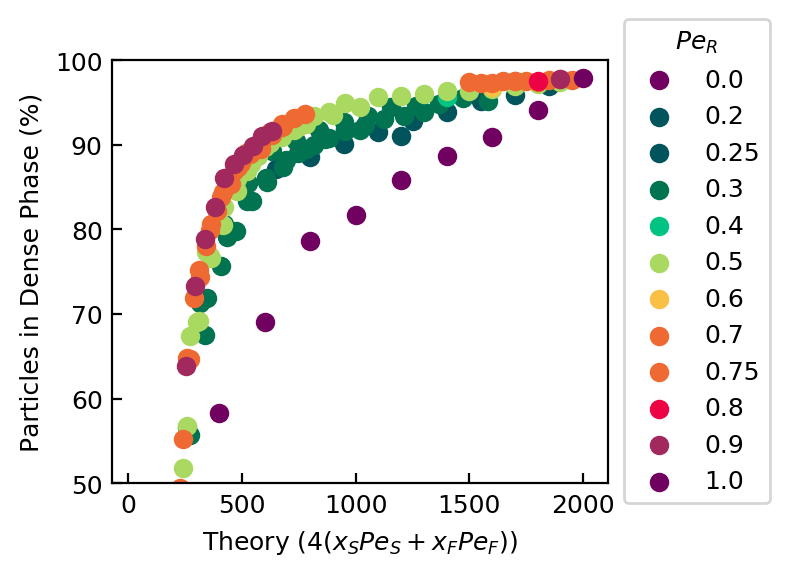

In [40]:
# Total dense phase composition
for i in xrange(numFiles):
    if params['peR'][i] != 0.1:
        plt.scatter(params['theoryDenom'][i], SS['Dense_tot'][i],
                    c=getCol(params['peR'][i]),
                    label=str(params['peR'][i])
                   )

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7, bbox_to_anchor=(1.35, 0.525), title=r'$Pe_{R}$')
# plt.xlim(0, 1)
plt.ylim(50, 100)
plt.xlabel(r'Theory $\left(4(x_{S}Pe_{S} + x_{F}Pe_{F})\right)$')
plt.ylabel(r'Particles in Dense Phase (%)')

Text(0,0.5,'Particles in Dense Phase (%)')

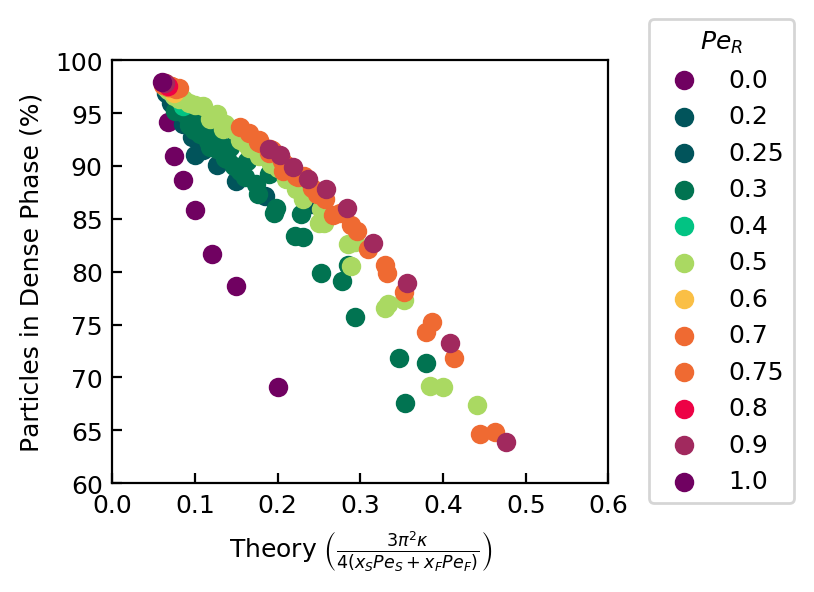

In [38]:
# Total dense phase composition
for i in xrange(numFiles):
    if params['peR'][i] != 0.1:
        plt.scatter(params['theory'][i], SS['Dense_tot'][i],
                    c=getCol(params['peR'][i]),
                    label=str(params['peR'][i])
                   )

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=7, bbox_to_anchor=(1.40, 0.525), title=r'$Pe_{R}$')
plt.xlim(0, 0.6)
plt.ylim(60, 100)
plt.xlabel(r'Theory $\left(\frac{3\pi^{2}\kappa}{4(x_{S}Pe_{S} + x_{F}Pe_{F})}\right)$')
plt.ylabel(r'Particles in Dense Phase (%)')

(0, 50)

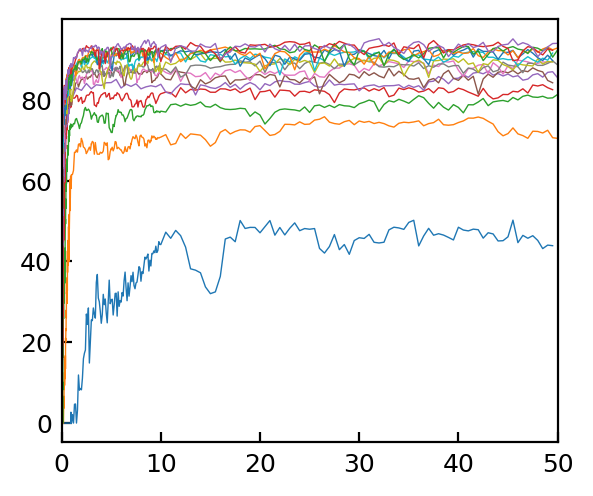

In [17]:
for i in xrange(numFiles):
    if params['peR'][i] == 0.1:
        plt.plot(all_sims[i]['Timestep'][:] / params['brownTime'][i],
                 all_sims[i]['Dense_tot'][:] / params['partAll'][i] * 100.0)
plt.xlim(0, 50)